# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?' # YOUR CODE HERE
units = "metric"

# Build partial query URL:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city  # YOUR CODE HERE

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']   # YOUR CODE HERE
        city_lng = city_weather['coord']['lon']   # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']   # YOUR CODE HERE
        city_humidity =  city_weather['main']['humidity']   # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']   # YOUR CODE HERE
        city_wind = city_weather['wind']['speed']   # YOUR CODE HERE
        city_country = city_weather['sys']['country']   # YOUR CODE HERE
        city_date = city_weather['dt']   # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova sintra
Processing Record 2 of Set 1 | aioun
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | kapit
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | sao vicente
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | udachny
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | simanggang
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | tikrit
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)   # YOUR CODE HERE

# Show Record Count
city_data_df.count()


City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova sintra,14.8667,-24.7167,22.80,79,24,7.30,CV,1689601373
1,aioun,16.6614,-9.6149,35.17,36,91,2.61,MR,1689601373
2,iqaluit,63.7506,-68.5145,4.85,100,100,4.92,CA,1689601373
3,cidreira,-30.1811,-50.2056,12.60,66,0,5.36,BR,1689601373
4,port-aux-francais,-49.3500,70.2167,4.25,98,100,16.33,TF,1689601374


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,22.80,79,24,7.30,CV,1689601373
1,aioun,16.6614,-9.6149,35.17,36,91,2.61,MR,1689601373
2,iqaluit,63.7506,-68.5145,4.85,100,100,4.92,CA,1689601373
3,cidreira,-30.1811,-50.2056,12.60,66,0,5.36,BR,1689601373
4,port-aux-francais,-49.3500,70.2167,4.25,98,100,16.33,TF,1689601374


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

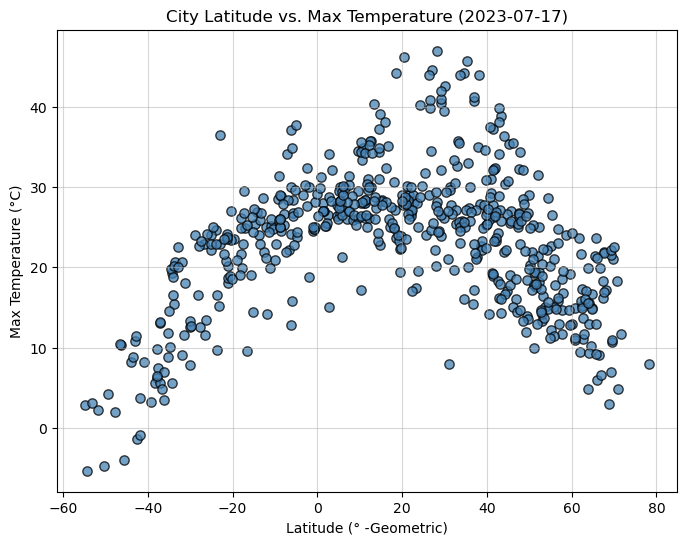

In [13]:
import datetime

# Today's date
today = datetime.date.today()

# Convert today's date to the desired format
date_format = today.strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
cities_latitude = city_data_df['Lat']
cities_temperature = city_data_df['Max Temp']

# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(8, 6))

plt.scatter(cities_latitude, cities_temperature, marker="o", s = 45, edgecolors = 'k', facecolors = 'steelblue', alpha = 0.75)

plt.xlabel('Latitude (\u00b0 -Geometric)')
plt.ylabel('Max Temperature (\u00b0C)')
plt.title(f'City Latitude vs. Max Temperature ({date_format})')
plt.grid(True, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

# https://stackoverflow.com/questions/17245612/formatting-time-as-d-m-y
# https://stackoverflow.com/questions/3215168/how-to-get-character-in-a-string-in-python



#### Latitude Vs. Humidity

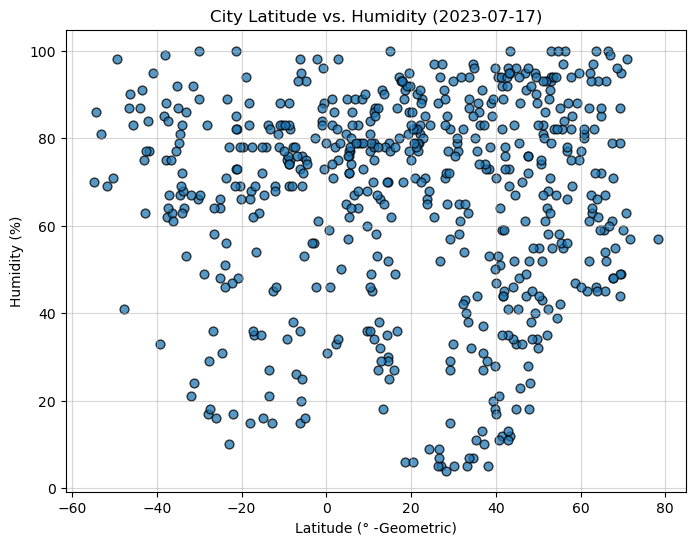

In [14]:
import datetime

# Today's date
today = datetime.date.today()

# Convert today's date to the desired format
date_format = today.strftime("%Y-%m-%d")

fig, ax = plt.subplots(figsize=(8, 6))
city_data_df.plot.scatter(x='Lat', y='Humidity', marker="o", s=40, edgecolors='k', facecolors='steelblue', alpha=0.75, ax = ax)

plt.xlabel('Latitude (\u00b0 -Geometric)')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date_format})')
plt.grid(True, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

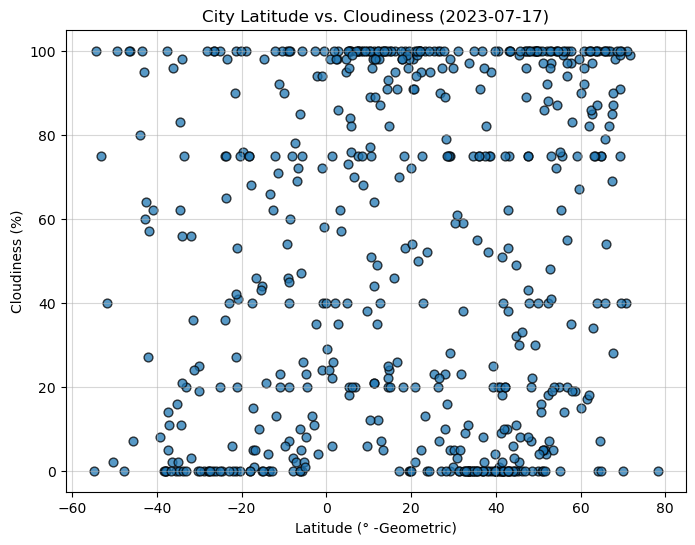

In [15]:
import datetime

# Today's date
today = datetime.date.today()

# Convert today's date to the desired format
date_format = today.strftime("%Y-%m-%d")

fig, ax = plt.subplots(figsize=(8, 6))
city_data_df.plot.scatter(x='Lat', y='Cloudiness', marker="o", s=40, edgecolors='k', facecolors='steelblue', alpha=0.75, ax = ax)

plt.xlabel('Latitude (\u00b0 -Geometric)')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date_format})')
plt.grid(True, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

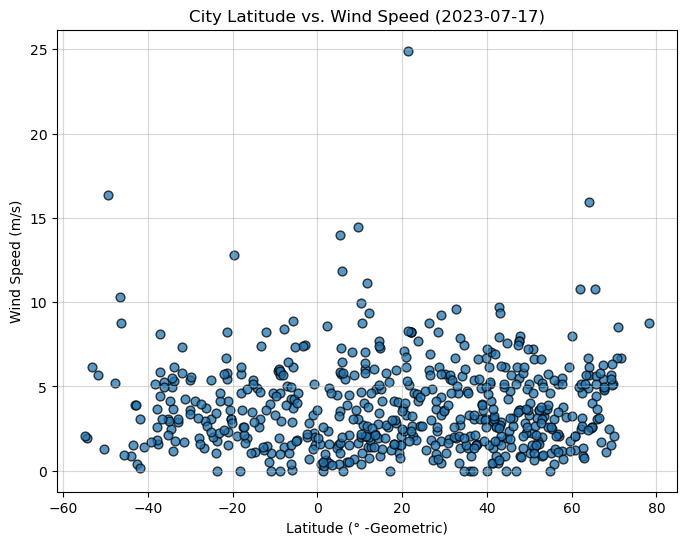

In [16]:
import datetime

# Today's date
today = datetime.date.today()

# Convert today's date to the desired format
date_format = today.strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. cloudiness
# Incorporate the other graph properties
# YOUR CODE HERE

fig, ax = plt.subplots(figsize=(8, 6))
city_data_df.plot.scatter(x='Lat', y='Wind Speed', marker="o", s=40, edgecolors='k', facecolors='steelblue', alpha=0.75, ax = ax)


plt.xlabel('Latitude (\u00b0 -Geometric)')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date_format})')
plt.grid(True, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
from scipy.stats import linregress
import datetime

# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regression(data_df, df_label, y_var, y_label, ax):

    # Generate scatter plot
    data_df.plot.scatter(x='Lat', y=y_var, ax=ax)
    ax.set_xlabel('Latitude (\u00b0 -Geometric)')
    ax.set_ylabel(y_label)
    ax.set_title(f'{df_label}\nCity Latitude vs. {y_label}')

    # Generate linear regression model
    slope, intercept, r_value, p_value, std_err = linregress(data_df['Lat'], data_df[y_var])

    straight_line = f'{y_var} = ({slope:.2f}) Latitude + {intercept:.2f}'
    ax.plot(data_df['Lat'], (slope * data_df['Lat'] + intercept), color='red', label=straight_line)
    ax.legend(loc= (0.25, 1.2))

    # Add r-value annotation
    ax.text(0.05, 0.95, f'r-value: {r_value:.2f}', transform=ax.transAxes, ha='left', va='top')

    ax.grid(False)


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0.0].copy()

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova sintra,14.8667,-24.7167,22.80,79,24,7.30,CV,1689601373
1,aioun,16.6614,-9.6149,35.17,36,91,2.61,MR,1689601373
2,iqaluit,63.7506,-68.5145,4.85,100,100,4.92,CA,1689601373
5,yellowknife,62.4560,-114.3525,17.29,67,100,4.63,CA,1689601311
7,tiksi,71.6872,128.8694,11.72,57,99,6.66,RU,1689601374


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0.0].copy()

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cidreira,-30.1811,-50.2056,12.60,66,0,5.36,BR,1689601373
4,port-aux-francais,-49.3500,70.2167,4.25,98,100,16.33,TF,1689601374
6,puerto natales,-51.7236,-72.4875,2.25,69,40,5.66,CL,1689601374
8,grytviken,-54.2811,-36.5092,-5.33,86,100,1.94,GS,1689601374
12,sao vicente,-23.9631,-46.3919,24.59,51,75,1.03,BR,1689601375


###  Temperature vs. Latitude Linear Regression Plot

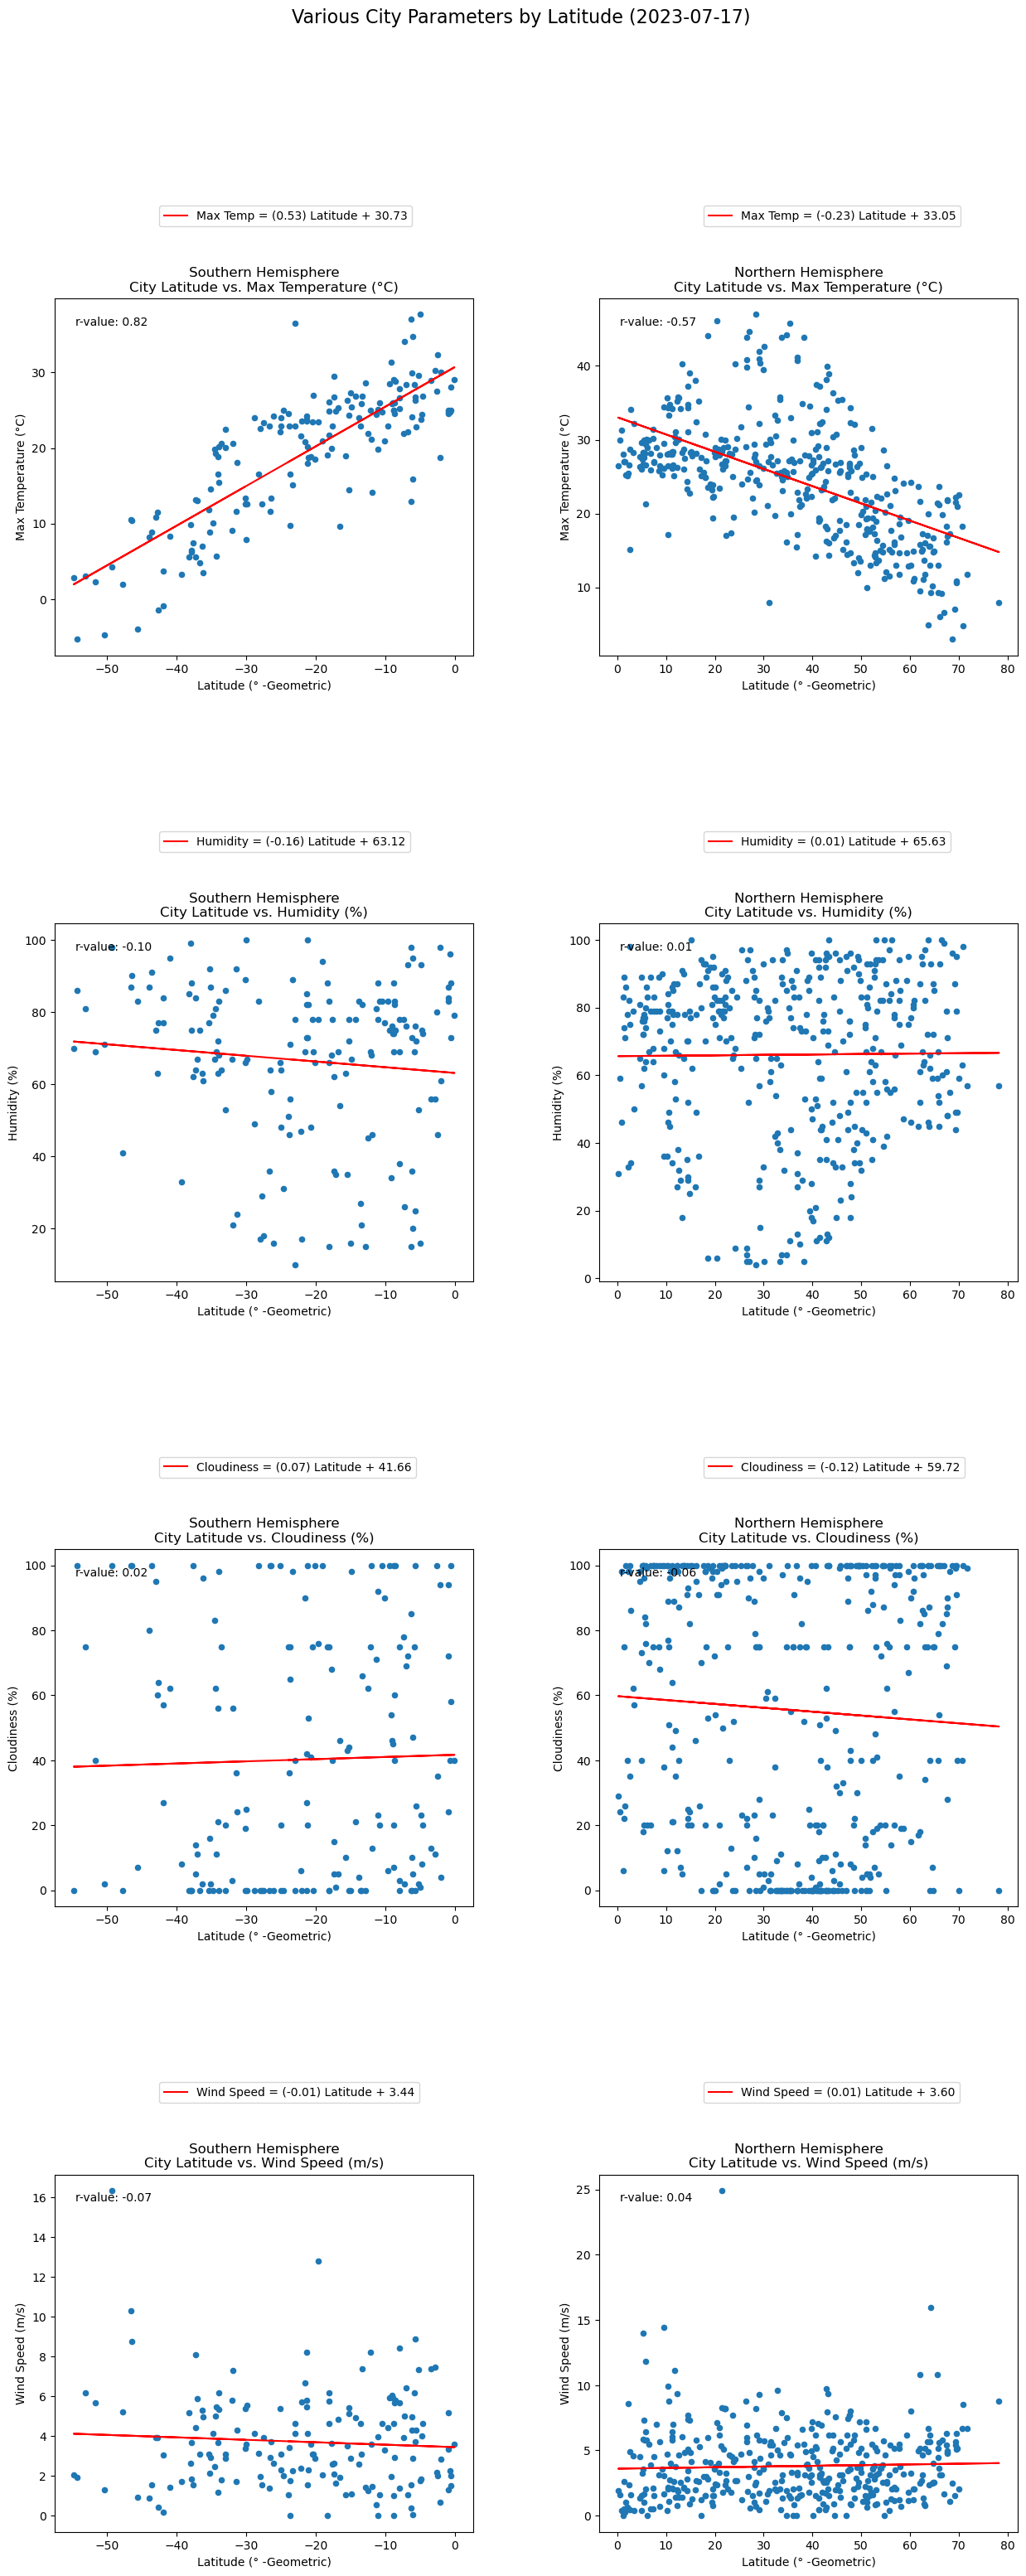

In [20]:
import datetime

# Today's date
today = datetime.date.today()
date_format = today.strftime("%Y-%m-%d")


y_list = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
y_label = ['Max Temperature (\u00b0C)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/s)']
data_df = [southern_hemi_df, northern_hemi_df]
df_label = ['Southern Hemisphere', 'Northern Hemisphere']

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 35))
fig.suptitle(f'Various City Parameters by Latitude ({date_format})', fontsize=16)
fig.subplots_adjust(hspace=0.75, wspace=0.3)

for i in range(len(y_list)):
    # Northern Hemisphere plot
    linear_regression(data_df[0], df_label[0], y_list[i], y_label[i], axs[i, 0])

    # Southern Hemisphere plot
    linear_regression(data_df[1], df_label[1], y_list[i], y_label[i], axs[i, 1])

plt.show()

## All Regression Charts and Code are in the preceding cell (above).

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- Please see attached word file: WdWeatherPyAnalysis.docx

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- Please see attached word file: WdWeatherPyAnalysis.docx

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- Please see attached word file: WdWeatherPyAnalysis.docx

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

- Please see attached word file: WdWeatherPyAnalysis.docx